# Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

from algorithms.epsilon_greedy import EpsilonGreedy

# Pilot runs for epsilon-greedy tuning

In [2]:
# bandit experiment parameters
num_arms = 10
num_steps = 10000
num_runs = 300

## a. Using decreasing step size

In [3]:
# epsilons to consider
epsilons = [0.01, 0.05, 0.1, 0.2]

# performance of algorithm
terminal_average_reward = []

for epsilon in epsilons:

    # set random seed
    np.random.seed(42)

    terminal_average_reward_per_run = []


    for run in range(num_runs):

        # create testbed using epsilon-greedy search
        bandit = EpsilonGreedy(num_arms= num_arms, epsilon= epsilon)

        # run experiment to obtain terminal average reward
        terminal_avg_reward = bandit.run_experiment(num_steps= num_steps)

        terminal_average_reward_per_run.append(terminal_avg_reward)

        # update seed for next run
        seed = np.random.randint(100000)
        np.random.seed(seed)

    # for each epsilon
    terminal_average_reward.append(terminal_average_reward_per_run)

## Average Rewards

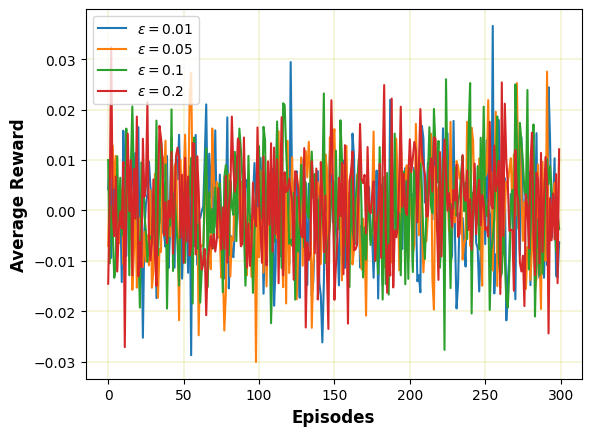

In [4]:
plt.plot(terminal_average_reward[0], label = '$\epsilon = {}$'.format(epsilons[0]))
plt.plot(terminal_average_reward[1], label = '$\epsilon = {}$'.format(epsilons[1]))
plt.plot(terminal_average_reward[2], label = '$\epsilon = {}$'.format(epsilons[2]))
plt.plot(terminal_average_reward[3], label = '$\epsilon = {}$'.format(epsilons[3]))
plt.legend()
plt.xlabel('Episodes', weight = 'bold', fontsize = 12)
plt.ylabel('Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

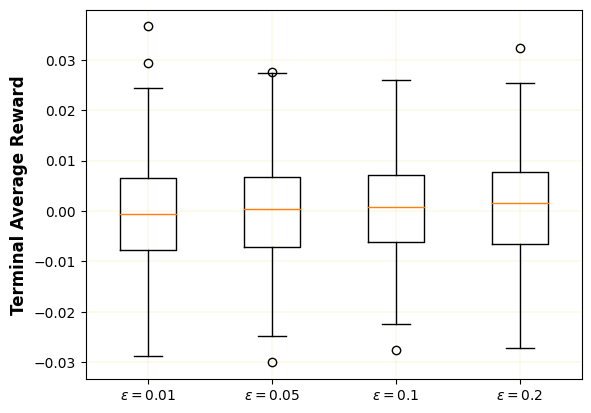

In [5]:
labels = ['$\epsilon = 0.01$', '$\epsilon = 0.05$', '$\epsilon = 0.1$', '$\epsilon = 0.2$']

fig, ax = plt.subplots()

ax.set_ylabel('Terminal Average Reward', weight = 'bold', fontsize = 12)

ax.grid(color = 'y', linewidth = 0.1)

bplot = ax.boxplot(terminal_average_reward, patch_artist= False, labels= labels)

plt.show()

# b. Using fixed step size (epsilon = 0.1)

In [7]:
alphas = [0.5, 0.2, 0.1, 0.05, 0.01]

epsilon = 0.1

terminal_average_reward_for_fixed = []

for alpha in alphas:

    # set random seed
    np.random.seed(42)

    terminal_average_reward_per_run = []

    for run in range(num_runs):

        # create testbed using epsilon-greedy search
        bandit = EpsilonGreedy(num_arms= num_arms, epsilon= epsilon, alpha= alpha)

        # run experiment to obtain terminal average reward
        terminal_avg_reward = bandit.run_experiment(num_steps= num_steps)

        terminal_average_reward_per_run.append(terminal_avg_reward)
        
        # update seed for next run
        seed = np.random.randint(100000)
        np.random.seed(seed)

    # for each epsilon
    terminal_average_reward_for_fixed.append(terminal_average_reward_per_run)



## Average Reward

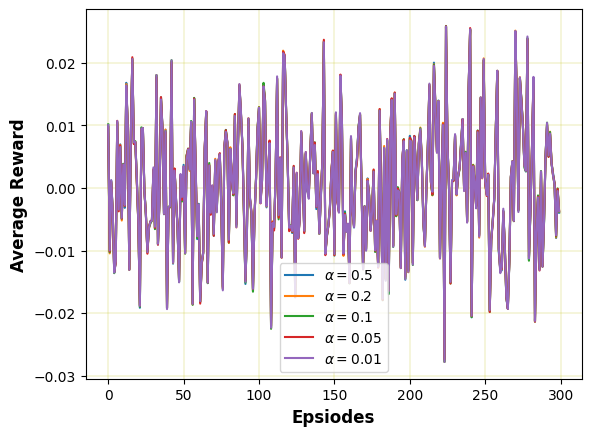

In [8]:
# for constant step size
plt.plot(terminal_average_reward_for_fixed[0], label = '$\\alpha = {}$'.format(alphas[0]))
plt.plot(terminal_average_reward_for_fixed[1], label = '$\\alpha = {}$'.format(alphas[1]))
plt.plot(terminal_average_reward_for_fixed[2], label = '$\\alpha= {}$'.format(alphas[2]))
plt.plot(terminal_average_reward_for_fixed[3], label = '$\\alpha= {}$'.format(alphas[3]))
plt.plot(terminal_average_reward_for_fixed[4], label = '$\\alpha = {}$'.format(alphas[4]))
plt.legend()
plt.xlabel('Epsiodes', weight = 'bold', fontsize = 12)
plt.ylabel('Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

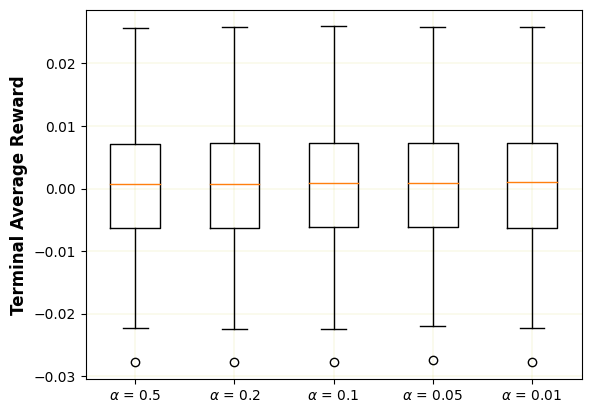

In [9]:
labels = ['$\\alpha$ = 0.5', '$\\alpha$ = 0.2', '$\\alpha$ = 0.1', '$\\alpha$ = 0.05', '$\\alpha$ = 0.01']

fig, ax = plt.subplots()

ax.set_ylabel('Terminal Average Reward', weight = 'bold', fontsize = 12)

ax.grid(color = 'y', linewidth = 0.1)

bplot = ax.boxplot(terminal_average_reward_for_fixed, patch_artist= False, labels= labels)

plt.show()